# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd

df = pd.read_csv('zillow_data.csv')

# Step 2: Data Preprocessing

In [2]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m') 

In [3]:
df.columns = list(df.columns[:7]) + list(get_datetimes(df))

In [4]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 3: Reshape from Wide to Long Format

In [5]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])    
    return melted#.groupby('time').aggregate({'value':'mean'})

In [6]:
melted_df = melt_data(df) #melt_data(df[df['RegionName'] == df['RegionName'][9429]])

In [7]:
melted_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [11]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [36]:
total_df['difference'] = total_df['value'].diff()

NameError: name 'total_df' is not defined

In [9]:
df.RegionName

0        60657
1        75070
2        77494
3        60614
4        79936
5        77084
6        10467
7        60640
8        77449
9        94109
10       11226
11       32162
12       11375
13       11235
14       37013
15       90250
16       60647
17       37211
18       78660
19       60618
20       10011
21       10128
22       77573
23       77584
24       28269
25       79912
26       78572
27       94565
28       30349
29       20002
         ...  
14693    12156
14694    97149
14695    77457
14696    80481
14697    20625
14698    20618
14699    80510
14700    49710
14701     1270
14702    12480
14703    83821
14704    29915
14705    49768
14706     3215
14707    28039
14708    97733
14709    92322
14710     3812
14711    89413
14712    92341
14713     3765
14714    84781
14715    12429
14716    97028
14717    12720
14718     1338
14719     3293
14720    40404
14721    81225
14722    89155
Name: RegionName, Length: 14723, dtype: int64

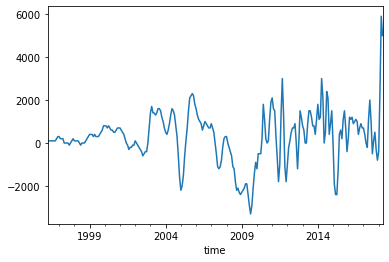

In [85]:
sns.set
total_df['difference'].plot()

In [86]:
from statsmodels.tsa.stattools import adfuller

X = total_df['difference'].values[1:]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.465928
p-value: 0.008906
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [87]:
total_df['difference2'] = total_df['difference'].diff()

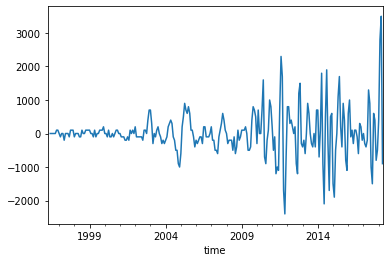

In [88]:
total_df.difference2.plot()

In [80]:
from statsmodels.tsa.stattools import adfuller

X = total_df['difference2'].values[2:]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.278629
p-value: 0.000484
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [92]:
from statsmodels.tsa import SARIMAX


ImportError: cannot import name 'SARIMAX' from 'statsmodels.tsa' (/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/statsmodels/tsa/__init__.py)

# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
ans = [] #running SARIMA model for each combination of pdq in range 0-3
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(melted_df.value,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =105500985.26556931
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =104979224.8167602


In [ ]:
min(ans, key = lambda x: x[2]) #finding the minimum AIC for each model created in order to find best pdq

In [7]:
melted_df.set_index(['RegionName','time'], inplace=True)

In [8]:
melted_df = melted_df['value']

In [9]:
melted_df.drop(columns = ['RegionID'],inplace=True)

In [10]:
melted_df = pd.DataFrame(melted_df)

In [11]:
final_df = melted_df.unstack()

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

In [12]:
final_df = final_df['value']

In [13]:
df2 = final_df.transpose()

In [14]:
df2[df2.columns[1]]

time
1996-04-01    161000.0
1996-05-01    160100.0
1996-06-01    159300.0
1996-07-01    158600.0
1996-08-01    158000.0
                ...   
2017-12-01    342000.0
2018-01-01    344500.0
2018-02-01    347400.0
2018-03-01    350600.0
2018-04-01    353300.0
Name: 1002, Length: 265, dtype: float64

In [15]:
for col in df2.columns:
    df2[col] = df2[col].pct_change(periods=12) #finding the percent change of median house price YoY

In [16]:
df2.dropna(inplace=True)

In [17]:
df_mean = pd.DataFrame(df2.mean().sort_values(ascending=False)) #sorting the mean of YoY percent change for each zipcode

In [18]:
df_mean.reset_index(inplace=True)

In [19]:
df_mean.columns = ['zipcode', 'mean']

In [20]:
df_zipcodes = df_mean[df_mean['mean'] > df_mean['mean'].quantile(.90)] #taking the top %10 of zipcodes with highest average YoY change

In [21]:
top_zips = list(df_zipcodes.zipcode)

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Step 6: Models
Give a detailed interpretation of results including the relationship between the inputs and output of the model.

In [22]:
frame_list = [] #creating a list of dataframes. each dataframe is a different zipcode
for code in top_zips:
    df = melted_df.loc[code]
    df = pd.DataFrame(df['value'])
    df.columns = [code]
    frame_list.append(df)

In [23]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df.value,
                                            order=(1,2,2),
                                            seasonal_order=(2,2,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

output = mod.fit()

In [ ]:
from tqdm import tqdm

#model_list = []
for df in tqdm(frame_list):
    try:
        mod = sm.tsa.statespace.SARIMAX(df,
                                                order=(1,2,2),
                                                seasonal_order=(2,2,2,12),
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                exog = None)

        output = mod.fit()
        model_list.append(output)
    except:
        continue
    

  0%|          | 0/1473 [00:00<?, ?it/s]/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
  0%|          | 2/1473 [00:16<3:25:22,  8.38s/it]/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq,

In [172]:
df

,value
time,
2014-01-01,48400.0
2014-02-01,48800.0
2014-03-01,49500.0
2014-04-01,50400.0
2014-05-01,50100.0
2014-06-01,49100.0
2014-07-01,48800.0
2014-08-01,49300.0
2014-09-01,50000.0
